In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import mglearn 
plt.rc('font', family='NanumGothic')

In [267]:
star=pd.read_csv('ntntnt.csv',encoding='cp949')

In [268]:
star.head()

,한식음식점업,분식 및 김밥전문점,체인화 편의점,제과점업,starbucks,n_bank,n_subway,closed_rate,increase_rate,Number_of_businesses,Number_of_employees,Average_employee,Occupational_Density_(A),City-to-city_transport_move_in
0,51,2,2,0,0,5,0,0,31,2865,10639,4,7940,21
1,90,19,12,14,0,6,0,3,-1,1909,10539,6,10978,1299
2,246,34,33,15,1,9,3,4,-1,3598,28777,8,25466,1345
3,70,7,12,0,0,1,0,4,0,976,2820,3,7050,493
4,429,77,76,21,1,27,2,3,1,13752,153745,11,61010,2575


In [269]:
star.isna().sum()

한식음식점업                            0
분식 및 김밥전문점                        0
체인화 편의점                           0
제과점업                              0
starbucks                         0
n_bank                            0
n_subway                          0
closed_rate                       0
increase_rate                     0
Number_of_businesses              0
Number_of_employees               0
Average_employee                  0
Occupational_Density_(A)          0
City-to-city_transport_move_in    0
dtype: int64

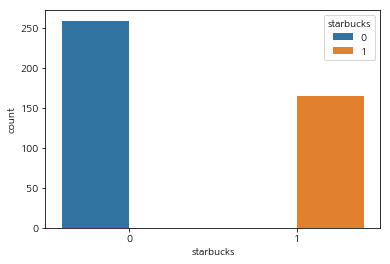

In [270]:
sns.countplot(data=star, x='starbucks', hue='starbucks')

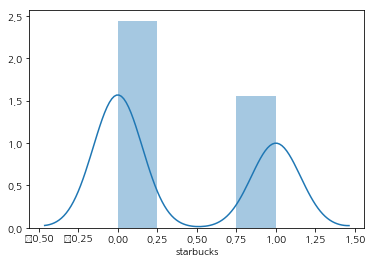

In [271]:
sns.distplot(star['starbucks'])

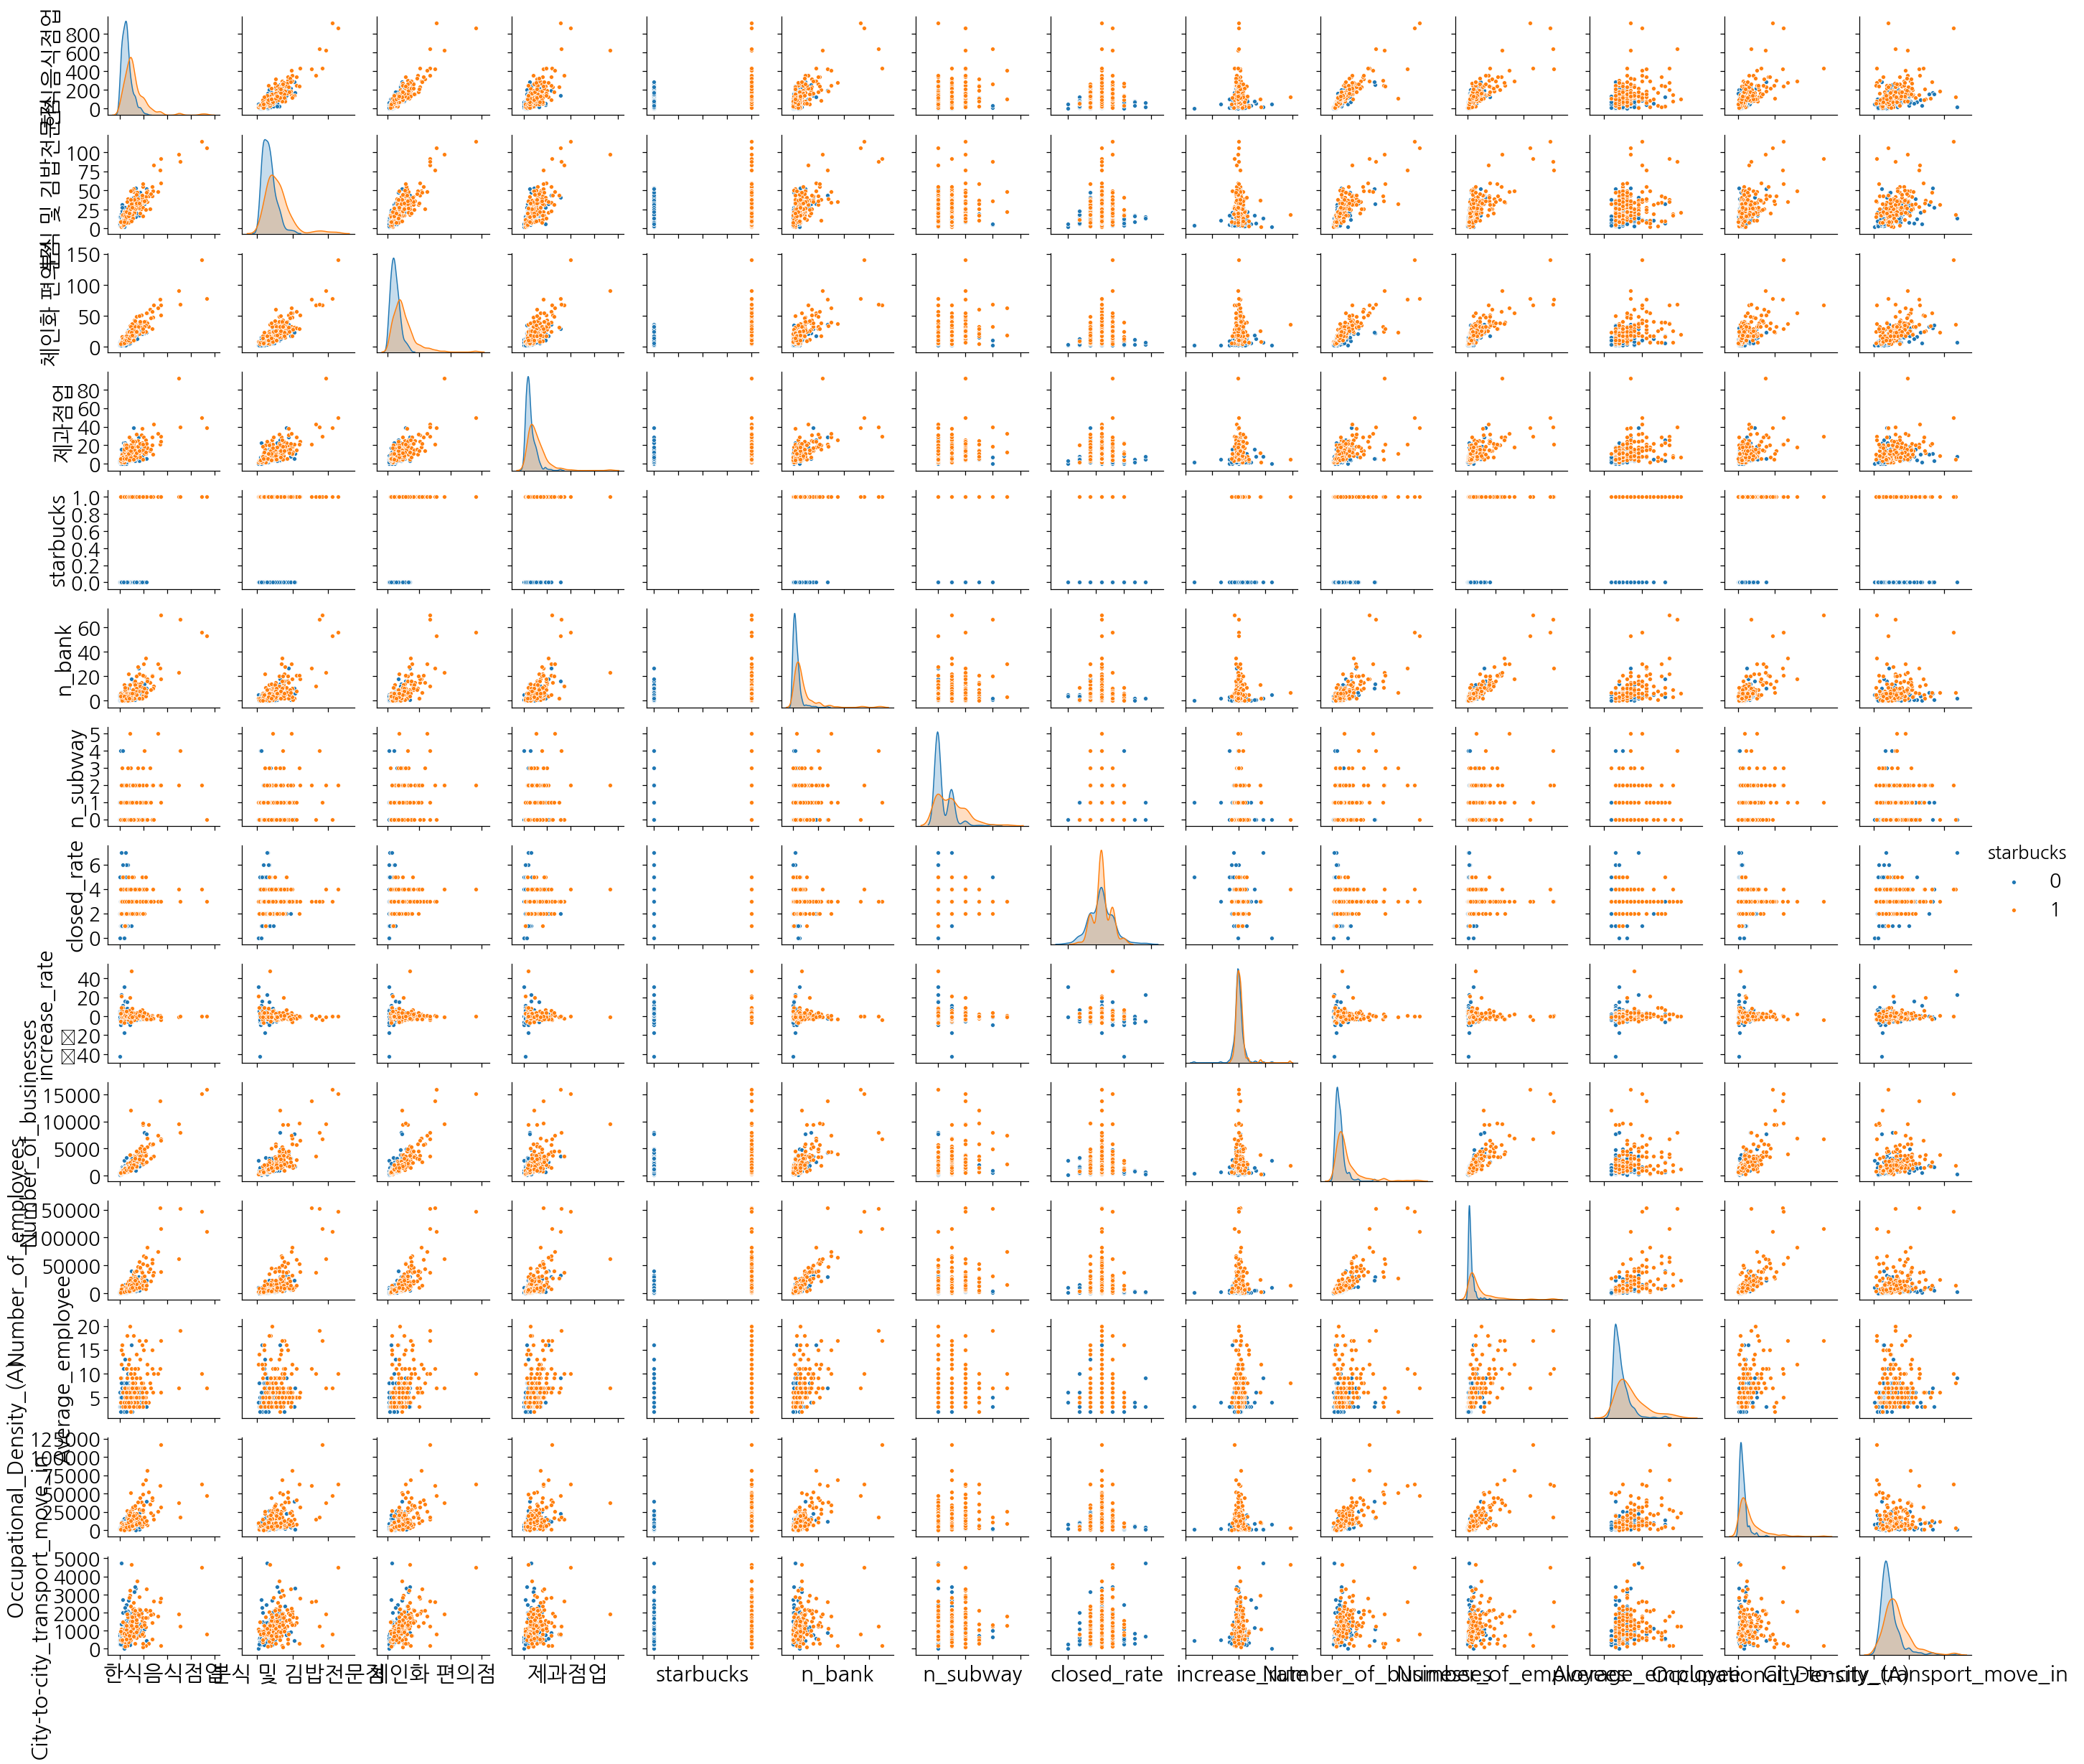

In [272]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(star, hue='starbucks', size=3)
g.set(xticklabels=[]);

In [273]:
star=star.drop(['increase_rate'],axis=1)

In [274]:
star.isna().sum()

한식음식점업                            0
분식 및 김밥전문점                        0
체인화 편의점                           0
제과점업                              0
starbucks                         0
n_bank                            0
n_subway                          0
closed_rate                       0
Number_of_businesses              0
Number_of_employees               0
Average_employee                  0
Occupational_Density_(A)          0
City-to-city_transport_move_in    0
dtype: int64

In [218]:
#star=star.drop(['dong_code','dong_name','danger_name','n_starbucks'],axis=1)

In [330]:
st=star

In [331]:
X = st.iloc[:, st.columns != 'starbucks']
y = st.iloc[:, st.columns == 'starbucks']

In [277]:
from imblearn.over_sampling import SMOTE # 클래스 불균형 해결 

In [278]:
from imblearn.combine import SMOTEENN

In [279]:
from imblearn.combine import SMOTETomek

In [280]:
from sklearn.model_selection import train_test_split

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

In [333]:
sm=SMOTETomek(random_state=10)

In [334]:
X_train,y_train=sm.fit_sample(X_train,y_train)

In [335]:
X.columns

Index(['한식음식점업', '분식 및 김밥전문점', '체인화 편의점', '제과점업', 'n_bank', 'n_subway',
       'closed_rate', 'Number_of_businesses', 'Number_of_employees',
       'Average_employee', 'Occupational_Density_(A)',
       'City-to-city_transport_move_in'],
      dtype='object')

In [336]:
X_train=pd.DataFrame(X_train)

In [337]:
X_train.columns=X.columns

In [338]:
X_train.head()

,한식음식점업,분식 및 김밥전문점,체인화 편의점,제과점업,n_bank,n_subway,closed_rate,Number_of_businesses,Number_of_employees,Average_employee,Occupational_Density_(A),City-to-city_transport_move_in
0,304,43,32,14,16,1,3,9380,38813,4,52450,308
1,84,14,14,9,2,0,3,1176,6721,6,10183,1250
2,130,17,15,5,3,1,4,3246,23475,7,26676,1077
3,90,19,22,6,4,0,3,2221,12024,5,8070,898
4,68,19,14,12,4,1,3,1284,7286,6,7590,800


In [339]:
y_train=pd.DataFrame(y_train)

In [341]:
y_train.columns=y.columns

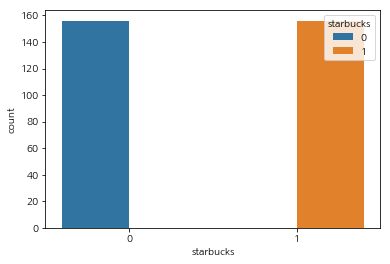

In [342]:
sns.countplot(data=y_train, x='starbucks', hue='starbucks')

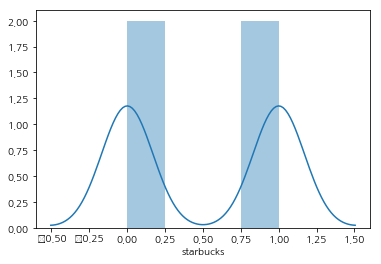

In [343]:
sns.distplot(y_train['starbucks'])

In [344]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report

In [345]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

In [346]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [347]:
kfold = StratifiedKFold(n_splits=10)

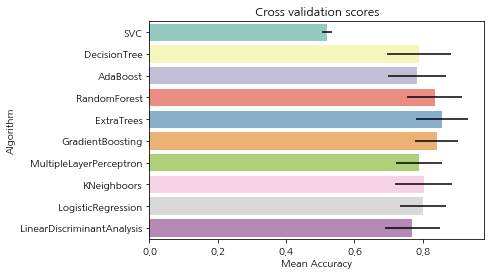

In [348]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [349]:
etc=ExtraTreesClassifier(random_state=10)

In [350]:
etc_model=etc.fit(X_train, y_train)

In [351]:
knn_scores = cross_val_score(knn, X_train, y_train,cv=10)
print('Scores =', knn_scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(knn_scores), np.std(knn_scores)))

Scores = [0.875      0.84375    0.71875    0.84375    0.75       0.875
 0.86666667 0.9        0.9        0.9       ]
CV accuracy: 0.847 +/- 0.060


In [352]:
y_pred_L=etc_model.predict(X_test)
# classification matrix
print('\nClassification metrics')
print(classification_report(y_true=y_test, y_pred=y_pred_L))


Classification metrics
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        77
           1       0.69      0.69      0.69        51

   micro avg       0.75      0.75      0.75       128
   macro avg       0.74      0.74      0.74       128
weighted avg       0.75      0.75      0.75       128

